In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [7]:
house_price=pd.read_csv('D:\Vinayak\Data Science\DS Fusion Tech\Linear Reg Assignment-Housing Example\Case Study - Housing Example\House_Prices.csv')

In [8]:
house_price

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [9]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


<AxesSubplot:xlabel='Price', ylabel='SqFt'>

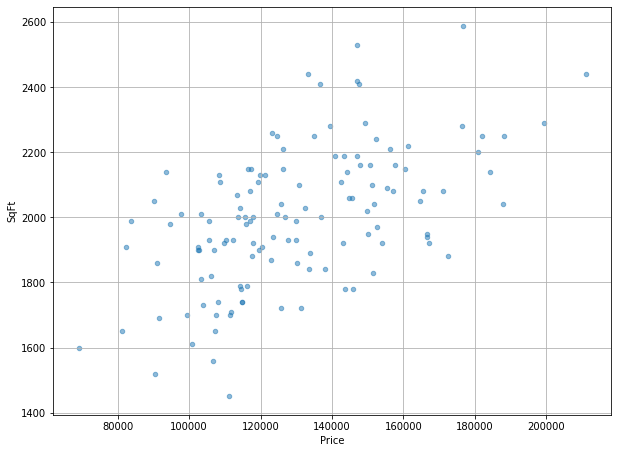

In [10]:
house_price.plot(kind='scatter', x='Price', y='SqFt', alpha=0.5)


In [11]:
house_price.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [12]:
pd.concat((house_price.min(),house_price.quantile(0.01),house_price.quantile(0.99),house_price.max()),axis=1)

,0.00,0.01,0.99,1.00
Home,1,2.27,126.73,128
Price,69100,81570.00,196476.00,211200
SqFt,1450,1530.80,2505.70,2590
Bedrooms,2,2.00,4.73,5
Bathrooms,2,2.00,3.00,4
Offers,1,1.00,5.00,6
Brick,No,NaN,NaN,Yes
Neighborhood,East,NaN,NaN,West


In [13]:
# Detect the missing value
house_price.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [14]:
#seperating out categorical and numerical var
numeric_var_names=[key for key in dict(house_price.dtypes) if dict(house_price.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(house_price.dtypes) if dict(house_price.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
['Brick', 'Neighborhood']


In [15]:
house_price_num=house_price[numeric_var_names]
house_price_num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [16]:
house_price_cat = house_price[cat_var_names]
house_price_cat.head(5)

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [17]:
# Creating Data summary on numeric dataframe audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=house_price_num.apply(lambda x: var_summary(x)).T

In [18]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [19]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=house_price_cat.apply(lambda x: cat_summary(x))

In [20]:
cat_summary

,Brick,Neighborhood
N,128,128
NMISS,0,0
ColumnsNames,"No 86 Yes 42 Name: Brick, dtype: int64",East 45 North 44 West 39 Name: Neig...


In [21]:
col_dummies=pd.get_dummies(house_price['Brick'], prefix='Brick')

In [22]:
col_dummies

,Brick_No,Brick_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
123,0,1
124,0,1
125,1,0
126,1,0


In [23]:
col_dummies=pd.get_dummies(house_price['Brick'], prefix='Brick')
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([house_price['Brick'], col_dummies], axis=1)
car_sales_cat.drop( 'Brick', axis = 1, inplace = True )

In [24]:
car_sales_cat

,Brick_Yes
0,0
1,0
2,0
3,0
4,0
...,...
123,1
124,1
125,0
126,0


In [25]:
# An utility function to create dummy variable   
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [26]:
car_sales_cat

,Brick_Yes
0,0
1,0
2,0
3,0
4,0
...,...
123,1
124,1
125,0
126,0


In [27]:
#for c_feature in categorical_features   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
house_price_cat=house_price[['Neighborhood','Brick']]

for c_feature in ['Neighborhood','Brick']:
    house_price_cat[c_feature] = house_price_cat[c_feature].astype('category')
    house_price_cat = create_dummies(house_price_cat , c_feature )

C:\Users\Home\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [28]:
house_price_cat

,Neighborhood_North,Neighborhood_West,Brick_Yes
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
123,0,0,1
124,0,0,1
125,1,0,0
126,0,1,0


In [29]:
house_price_new = pd.concat([house_price_num, house_price_cat], axis=1)

In [30]:
house_price_new

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_North,Neighborhood_West,Brick_Yes
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,0,0,1
124,125,147900,2160,4,3,3,0,0,1
125,126,113500,2070,2,2,2,1,0,0
126,127,149900,2020,3,3,1,0,1,0


C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

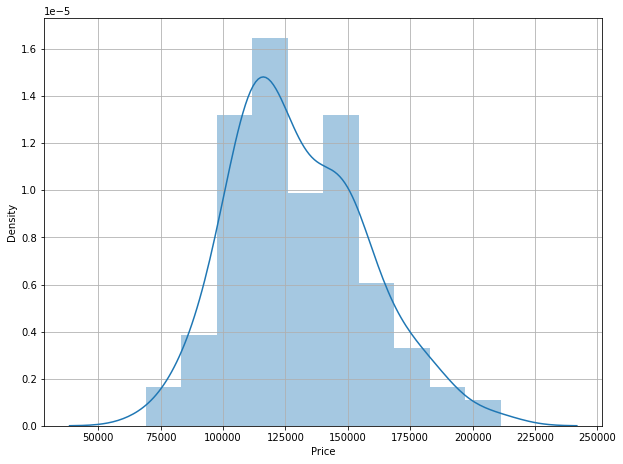

In [31]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(house_price_new.Price)

In [32]:
house_price_new["ln_house_price"]= np.log(house_price_new["Price"]+1)

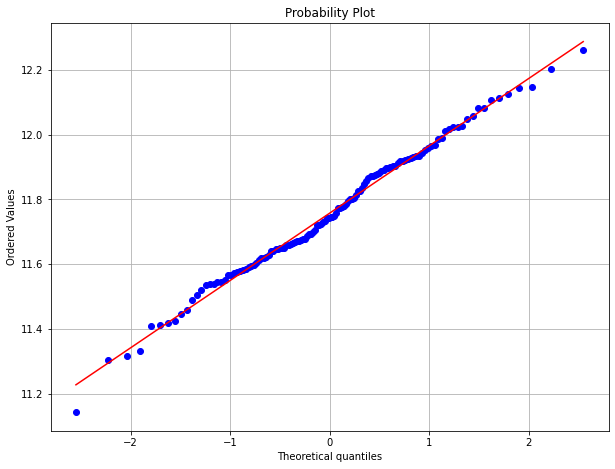

In [33]:
# Q-Q Plot
from scipy import stats
import pylab

stats.probplot( house_price_new.ln_house_price, dist="norm", plot=pylab )
pylab.show()

In [34]:
house_price_new

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_North,Neighborhood_West,Brick_Yes,ln_house_price
0,1,114300,1790,2,2,2,0,0,0,11.646591
1,2,114200,2030,4,2,3,0,0,0,11.645715
2,3,114800,1740,3,2,1,0,0,0,11.650955
3,4,94700,1980,3,2,3,0,0,0,11.458480
4,5,119800,2130,3,3,3,0,0,0,11.693587
...,...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,0,0,1,11.692752
124,125,147900,2160,4,3,3,0,0,1,11.904298
125,126,113500,2070,2,2,2,1,0,0,11.639567
126,127,149900,2020,3,3,1,0,1,0,11.917730


In [35]:
house_price_new=house_price_new.drop(['Price'],axis=1)

In [36]:
house_price_new

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_North,Neighborhood_West,Brick_Yes,ln_house_price
0,1,1790,2,2,2,0,0,0,11.646591
1,2,2030,4,2,3,0,0,0,11.645715
2,3,1740,3,2,1,0,0,0,11.650955
3,4,1980,3,2,3,0,0,0,11.458480
4,5,2130,3,3,3,0,0,0,11.693587
...,...,...,...,...,...,...,...,...,...
123,124,1900,3,3,3,0,0,1,11.692752
124,125,2160,4,3,3,0,0,1,11.904298
125,126,2070,2,2,2,1,0,0,11.639567
126,127,2020,3,3,1,0,1,0,11.917730


In [37]:
house_price_new.columns

Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Neighborhood_North',
       'Neighborhood_West', 'Brick_Yes', 'ln_house_price'],
      dtype='object')

In [38]:
house_price_new.corr()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_North,Neighborhood_West,Brick_Yes,ln_house_price
Home,1.000000,0.168553,-0.068568,0.127694,-0.053597,0.049859,0.026873,0.037376,0.111704
SqFt,0.168553,1.000000,0.483807,0.522745,0.336923,-0.288886,0.250759,0.079792,0.556572
Bedrooms,-0.068568,0.483807,1.000000,0.414556,0.114271,-0.364667,0.471477,0.046380,0.508153
Bathrooms,0.127694,0.522745,0.414556,1.000000,0.143793,-0.275830,0.285923,0.171977,0.508113
Offers,-0.053597,0.336923,0.114271,0.143793,1.000000,0.332987,-0.327425,-0.144986,-0.326332
Neighborhood_North,0.049859,-0.288886,-0.364667,-0.275830,0.332987,1.000000,-0.479098,-0.260554,-0.559956
Neighborhood_West,0.026873,0.250759,0.471477,0.285923,-0.327425,-0.479098,1.000000,0.115793,0.689422
Brick_Yes,0.037376,0.079792,0.046380,0.171977,-0.144986,-0.260554,0.115793,1.000000,0.442163
ln_house_price,0.111704,0.556572,0.508153,0.508113,-0.326332,-0.559956,0.689422,0.442163,1.000000


In [39]:
house_price_new.corr()['ln_house_price']

Home                  0.111704
SqFt                  0.556572
Bedrooms              0.508153
Bathrooms             0.508113
Offers               -0.326332
Neighborhood_North   -0.559956
Neighborhood_West     0.689422
Brick_Yes             0.442163
ln_house_price        1.000000
Name: ln_house_price, dtype: float64

In [40]:
# correlation matrix (ranges from 1 to -1)
np.abs(house_price_new.corr()['ln_house_price']).sort_values(ascending=False)

ln_house_price        1.000000
Neighborhood_West     0.689422
Neighborhood_North    0.559956
SqFt                  0.556572
Bedrooms              0.508153
Bathrooms             0.508113
Brick_Yes             0.442163
Offers                0.326332
Home                  0.111704
Name: ln_house_price, dtype: float64

<AxesSubplot:>

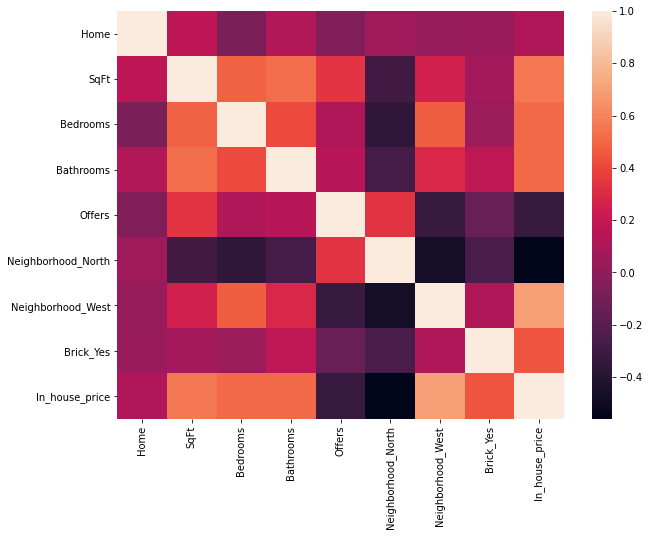

In [41]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(house_price_new.corr())

In [42]:
#Splitting the data

feature_columns = house_price_new.columns.difference( ['ln_house_price'] )
feature_columns

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Home', 'Neighborhood_North',
       'Neighborhood_West', 'Offers', 'SqFt'],
      dtype='object')

In [43]:
import numpy

In [44]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( house_price_new[feature_columns],
                                                  house_price_new['ln_house_price'],
                                                  test_size = 0.3,
                                                  random_state = 198 )

In [45]:
train_y

21     11.642207
66     11.745631
28     11.143324
101    11.720760
68     11.446796
         ...    
89     11.490690
74     11.878963
105    11.897514
71     11.967822
126    11.917730
Name: ln_house_price, Length: 89, dtype: float64

In [46]:
print(len( train_X ))
print(len( test_X))

89
39


# Building a linear regression model
Method-1

In [47]:
import statsmodels.api as sm

In [48]:
train_X = sm.add_constant(train_X)
lm = sm.OLS(train_y,train_X).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_house_price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     42.26
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.25e-25
Time:                        18:04:36   Log-Likelihood:                 92.645
No. Observations:                  89   AIC:                            -167.3
Df Residuals:                      80   BIC:                            -144.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.7577      0

In [50]:
print('Parameters:\n ', lm.params)
print('R2: ', lm.rsquared)

Parameters:
  const                 10.757694
Bathrooms              0.058089
Bedrooms               0.039264
Brick_Yes              0.125482
Home                   0.000153
Neighborhood_North    -0.000133
Neighborhood_West      0.153510
Offers                -0.065217
SqFt                   0.000405
dtype: float64
R2:  0.8086318921702221


In [51]:
# Error on training
test_X = sm.add_constant(test_X)
y_pred_train = lm.predict(train_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train_y, y_pred_train))
print('MSE:', metrics.mean_squared_error(train_y, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_train)))

MAE: 0.06565157254125835
MSE: 0.007300614659464931
RMSE: 0.08544363439990676


In [52]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.04988767572008239
MSE: 0.004696395548918598
RMSE: 0.06853025280063249


# Method-2

In [53]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(house_price_new,test_size=0.3,random_state = 123 ) 

In [54]:
train.head(5)

,Home,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood_North,Neighborhood_West,Brick_Yes,ln_house_price
79,80,1780,4,2,1,0,1,0,11.874794
104,105,1910,3,2,4,0,0,0,11.318139
60,61,2200,3,3,1,0,1,0,12.105705
21,22,2000,3,2,4,1,0,0,11.642207
11,12,1870,2,2,2,0,0,1,11.719948


In [55]:
train.columns

Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Neighborhood_North',
       'Neighborhood_West', 'Brick_Yes', 'ln_house_price'],
      dtype='object')

In [56]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Neighborhood_North',
       'Neighborhood_West', 'Brick_Yes', 'ln_house_price'],
      dtype='object')

In [57]:
all_columns = "+".join(train.columns.difference( ['ln_house_price'] ))

#print(all_columns)

my_formula = "ln_house_price~" + all_columns

print(my_formula)

ln_house_price~Bathrooms+Bedrooms+Brick_Yes+Home+Neighborhood_North+Neighborhood_West+Offers+SqFt


In [58]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_house_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     58.87
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           2.35e-30
Time:                        18:04:45   Log-Likelihood:                 101.58
No. Observations:                  89   AIC:                            -185.2
Df Residuals:                      80   BIC:                            -162.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.7407      0.091    117.973      0.000      10.559      10.922
Bathrooms              0.0558      0.021      2.648      0.010       0.014       0.098
Bedrooms               0.0210      0.017      1.232      0.222      -0.013       0.055
Brick_Yes              0.1340      0.021      6.388      0.000       0.092       0.176
Home                  -0.0003      0.000     -1.159      0.250      -0.001       0.000
Neighborhood_North     0.0037      0.024      0.155      0.877      -0.043       0.051
Neighborhood_West      0.1730      0.026      6.624      0.000       0.121       0.225
Offers                -0.0639      0.010     -6.136      0.000      -0.085      -0.043
SqFt                   0.0005   5.59e-05      8.075      0.000       0.000       0.001
==============================================================================
Omnibus:                        8.519   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.996
Skew:                          -0.442   Prob(JB):                      0.00410
Kurtosis:                       4.478   Cond. No.                     2.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
import statsmodels as sm

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [62]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_house_price~Bathrooms+Bedrooms+Brick_Yes+Home+Neighborhood_North+Neighborhood_West+Offers+SqFt', house_price_new, return_type='dataframe')

In [63]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [64]:
vif.round(1)

,VIF Factor,features
0,116.9,Intercept
1,1.5,Bathrooms
2,1.7,Bedrooms
3,1.1,Brick_Yes
4,1.1,Home
5,1.7,Neighborhood_North
6,1.7,Neighborhood_West
7,1.8,Offers
8,2.0,SqFt


In [65]:
X.head(5)

,Intercept,Bathrooms,Bedrooms,Brick_Yes,Home,Neighborhood_North,Neighborhood_West,Offers,SqFt
0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,1790.0
1,1.0,2.0,4.0,0.0,2.0,0.0,0.0,3.0,2030.0
2,1.0,2.0,3.0,0.0,3.0,0.0,0.0,1.0,1740.0
3,1.0,2.0,3.0,0.0,4.0,0.0,0.0,3.0,1980.0
4,1.0,3.0,3.0,0.0,5.0,0.0,0.0,3.0,2130.0


In [66]:
lm1=smf.ols('ln_house_price~SqFt+Bedrooms+Brick_Yes', house_price_new).fit()

In [67]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_house_price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     48.83
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           6.60e-21
Time:                        18:05:02   Log-Likelihood:                 71.109
No. Observations:                 128   AIC:                            -134.2
Df Residuals:                     124   BIC:                            -122.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7049      0.119     89.824      0.000      10.469      10.941
SqFt           0.0004   6.77e-05      5.399      0.000       0.000       0.000
Bedrooms       0.0873      0.020      4.431      0.000       0.048       0.126
Brick_Yes      0.1738      0.027      6.523      0.000       0.121       0.226
==============================================================================
Omnibus:                        3.788   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.822
Skew:                          -0.409   Prob(JB):                        0.148
Kurtosis:                       2.782   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
y_pred = lm1.predict(test_X)

In [70]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.10713869133332447
MSE: 0.016527972254809026
RMSE: 0.1285611615333691


C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

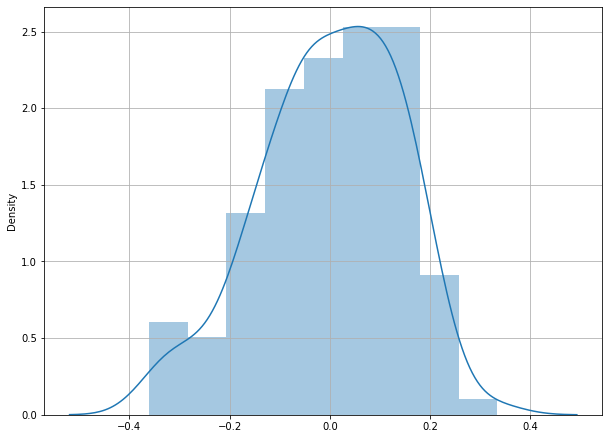

In [71]:
sns.distplot(lm1.resid)

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


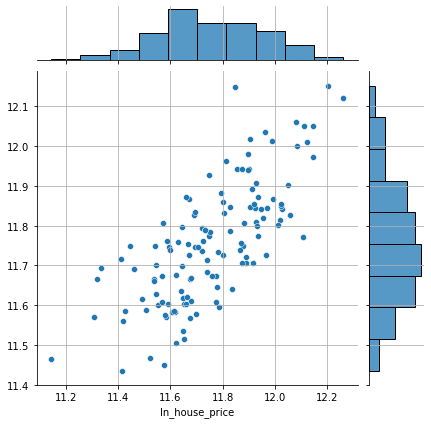

In [72]:
sns.jointplot(house_price_new.ln_house_price, lm1.predict(house_price_new) )

# USING sklearn Library to build the model
sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [73]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [74]:
linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
pd.concat([pd.Series(linreg.coef_),pd.Series(feature_columns)],axis=1)

,0,1
0,0.000000,Bathrooms
1,0.058089,Bedrooms
2,0.039264,Brick_Yes
3,0.125482,Home
4,0.000153,Neighborhood_North
5,-0.000133,Neighborhood_West
6,0.153510,Offers
7,-0.065217,SqFt
8,0.000405,NaN


In [76]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print (rmse_t)
print( metrics.r2_score( train_y, y_pred_t ))

0.0854436343999066
0.8086318921702229


In [77]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

0.06853025280060276
0.907539013747387


In [78]:
residuals = train_y - y_pred_train

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


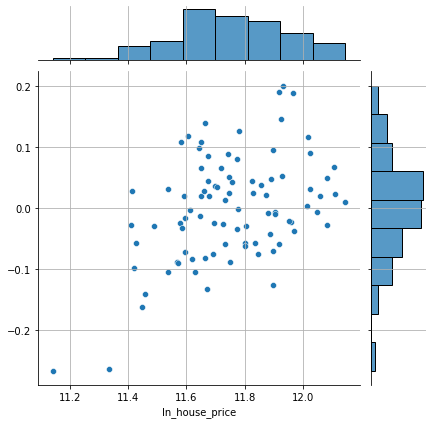

In [79]:
sns.jointplot(  train_y, residuals )

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

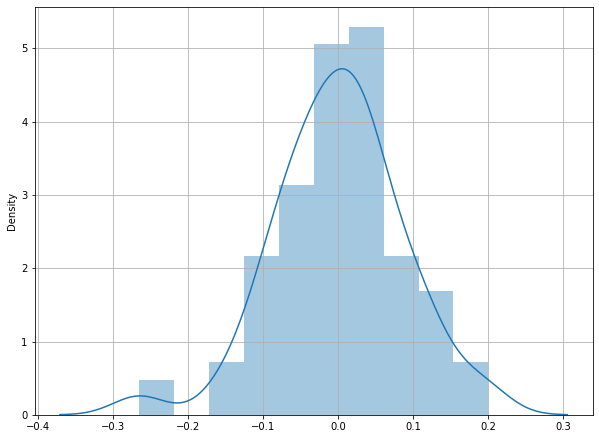

In [80]:
sns.distplot( residuals )

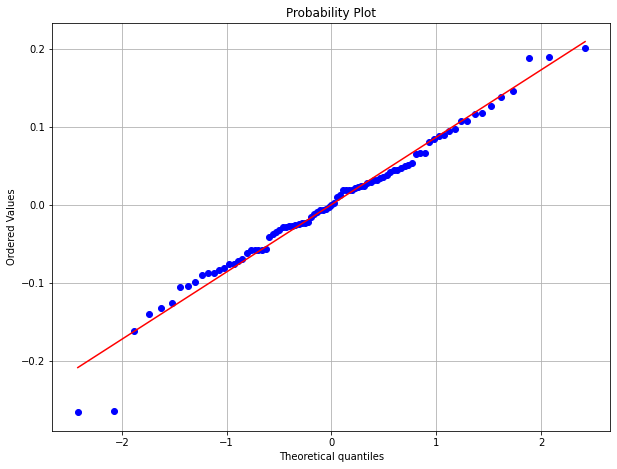

In [81]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [83]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [84]:
linreg = LinearRegression()

In [85]:
error_10=cross_val_score( linreg, house_price_new.drop('ln_house_price',axis=1), house_price_new['ln_house_price'], scoring = 'r2', cv = 10 )

In [86]:
round( np.mean( error_10), 2 )

0.77

In [87]:
np.std( error_10 )

0.14967580261624744

In [88]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [89]:
F_values, p_values  = f_regression(  train_X, train_y )

C:\Users\Home\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Home\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Home\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Home\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Home\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [90]:
F_values

array([        nan, 22.61822219, 27.56369651, 13.65603983,  0.6136104 ,
       54.6152645 , 68.04553993, 11.16045324, 26.04470285])

In [91]:
['%.3f' % p for p in p_values]

['nan', '0.000', '0.000', '0.000', '0.436', '0.000', '0.000', '0.001', '0.000']